# 1. 시계열 분석 개요
## 1) 시계열 분석의 개념
### (1) 시계열 분석의 개념
* 시계열 분석은 일정 시간 간격으로 기록된 자료들에 대하여 특성을 파악하고 미래를 예측하는 분석 방법
* 가까운 미래에 있을 날씨 예측, 주식 예측, 판매 예측 등의 목적으로 사용된다.
* 주가, 환율, 월별 재고량, 일일 확진자수 등이 시계열 자료에 해당한다

### (2) 시계열 자료의 자기상관성 ***
* 주식이나 기온 등의 시계열 자료들은 자기상관성을 가지고 있다.
* 이 말은 서로 이웃하는 자료들끼리 일종의 상관관계를 가진다는 말
* 수학적으로 풀어보면 하나의 잔차항의 크기가 이웃하는 다른
잔차항의 크기와 서로 일정한 관련이 있다는 의미
* 시계열 자료의 자기상관성을 파악하는 지표 = 공분산, 자기상관계수

### (3) 시계열 분석의 자료 ***
#### A. 정상성 시계열 자료
* 평균이 일정하고, 분산이 시점에 의존하지 않는 자료

#### B. 비정상성 시계열 자료
* 평균이 일정하지 않고, 분산이 시점에 의존하는 자료
* 대부분의 자료가 비정상성 자료이므로 정상성 시계열 자료로 변환해야 함

## 2) 시계열 자료의 정상성 조건 ***  (평균: 차분, 분산: 변환)
### (1) 일정한 평균
* 모든 시점에 대하여 평균이 일정해야 한다. 그렇지 않다면 **차분을 통해 정상화**할 수 있다.
* **차분**이란 **현 시점의 자료 값에서 전 시점의 자료 값을 빼는 것**이다.
* 만약 연중 기온을 예측하는 것과같이 계절적인 주기가 있는 경우에는 여러 시점 전의 자료값을 빼는 계절 차분을 사용한다

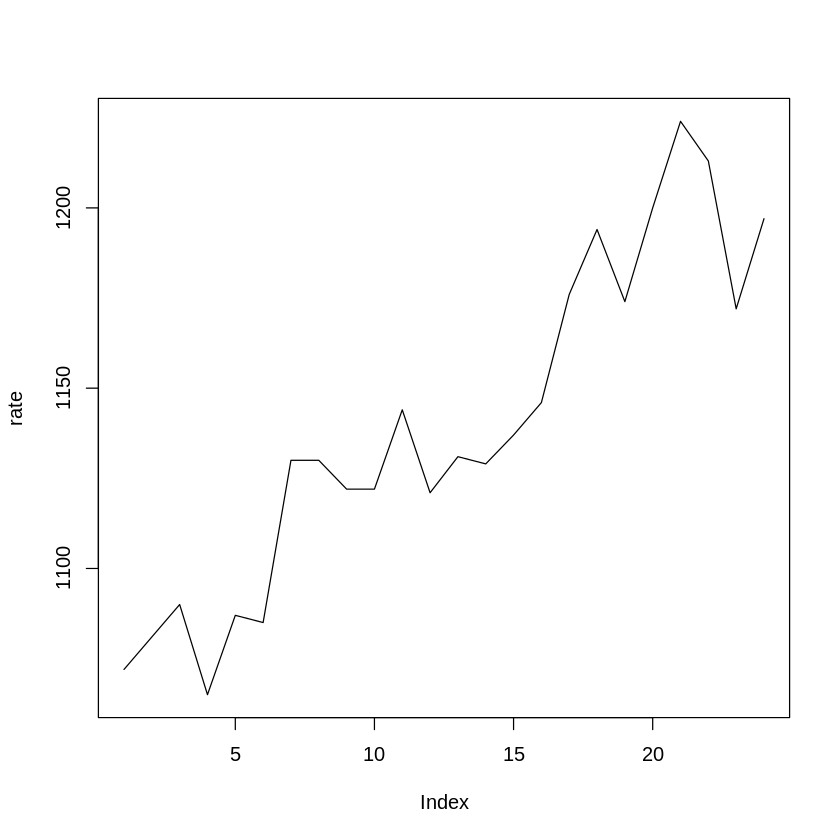

In [1]:
# 2018년 l월부터 2019년 12월까지 매월 초의 환율 데이터
rate <- c( 1072 , 1081 , 1090 , 1065 , 1087 , 1085 , 1130 , 1130 , 1122 , 1122 , 1144 ,
1121 , 1131 , 1129 , 1137 , 1146 , 1176 , 1194 , 1174 , 1200 , 1224 , 1213 , 1172 , 1197 )
plot( rate , type = 'l' )

* 평균이 일정하지 않다. 즉 정상성에 위배된다.
* 따라서 1회 차분을 실시한다.

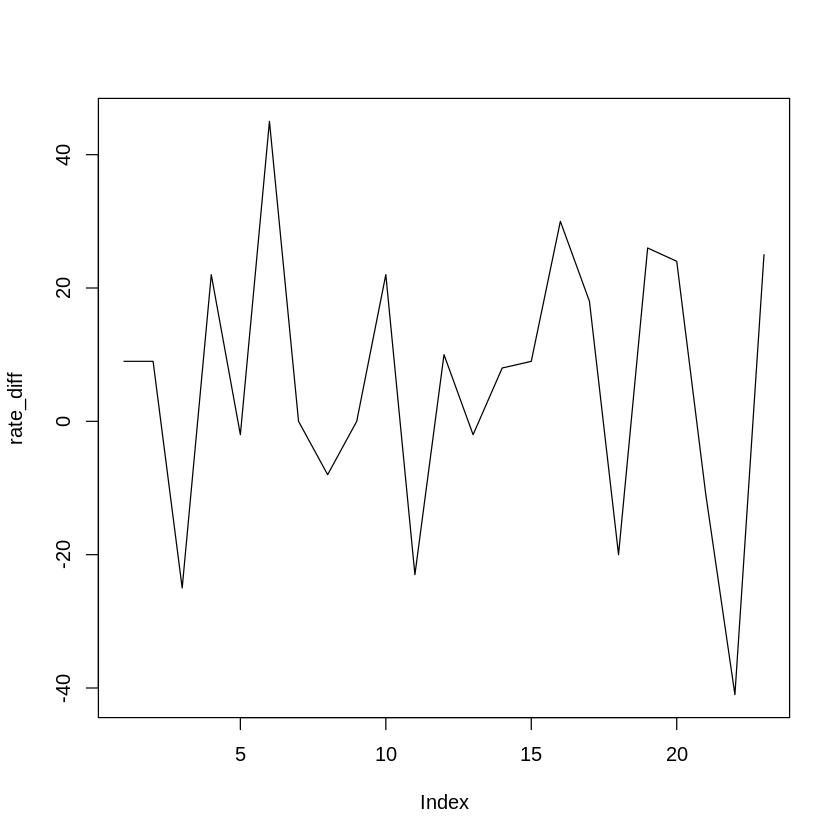

In [2]:
rate_diff <- diff( rate , lag = 1 )
plot( rate_diff , type = 'l' )

* 1회 차분 결과 평균이 일정해짐

### (2) 일정한 분산
* 모든 시점에 대하여 **분산**이 일정해야 한다. 그렇지 않다면 **변환을 통해 정상화**할 수 있다.
* 자료값에 지수 혹은 로그를 취해 변환하여 시간에따라 변하는 분산의 크기를 안정시킬 수 있다.

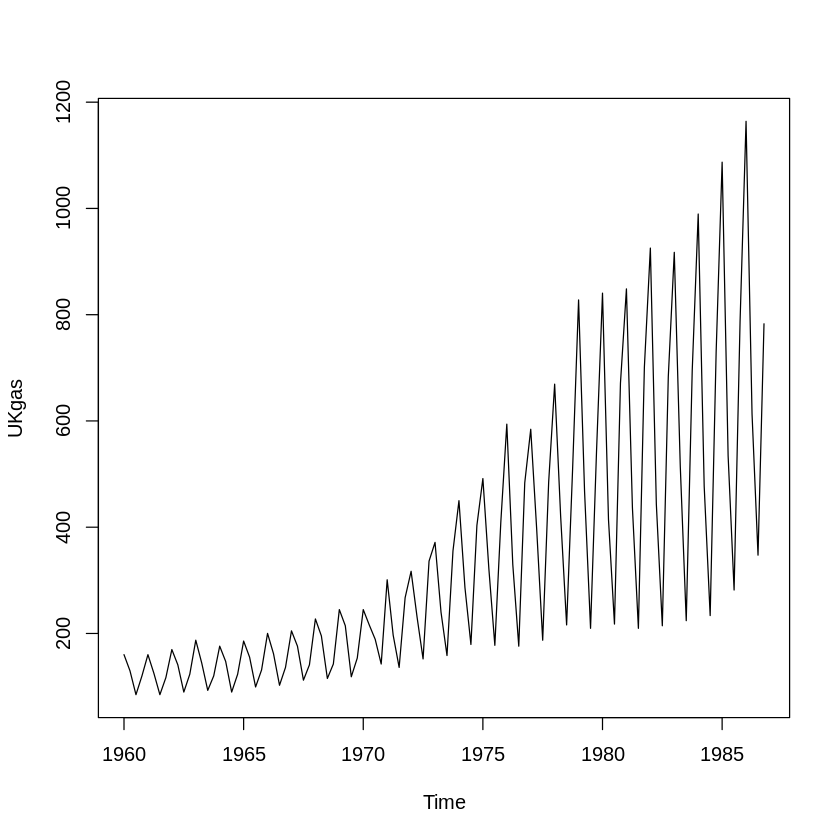

In [3]:
# R내장 시계열 데이터인 UKgas 활용
plot(UKgas)

* 시간이 흐름에 따라 분산이 일정하지 않닥 판단되어 정상성을 위배
* 자연상수 e를 밑으로 하는 log를 취하여 변환 실시

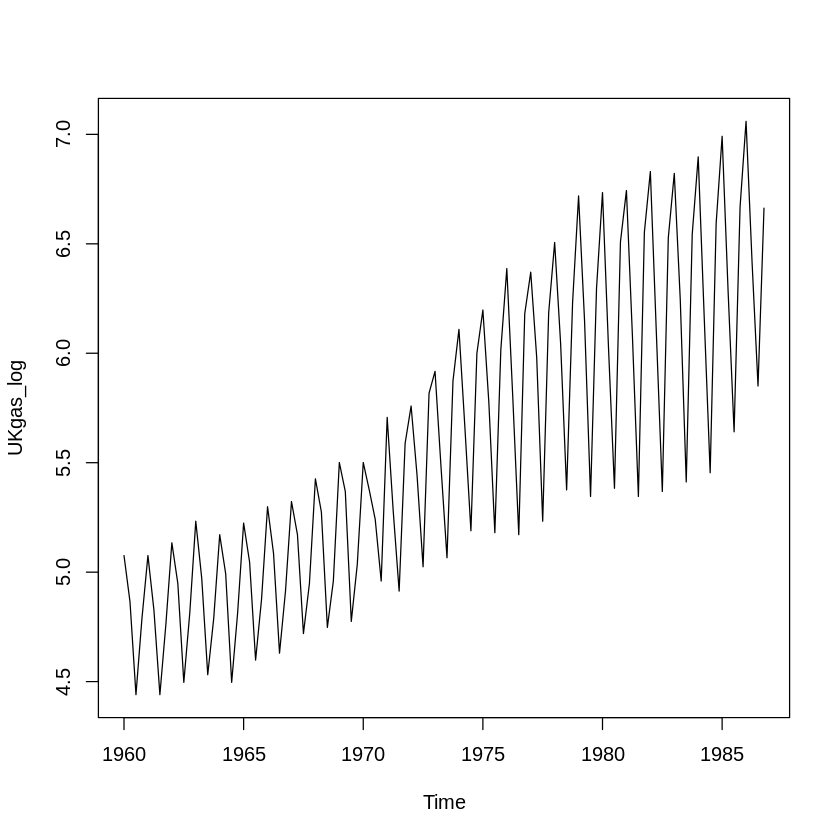

In [4]:
UKgas_log <- log(UKgas)
plot(UKgas_log)

* 변환 실시 후 분산이 일정해짐

### (3) 시차에만 의존 하는 공분산
* 공분산은 단지 시차에만 의존하고 특정 시점에 의존하지 않는다.
* t는 시점, s는 시차라고 했을 때,‘t시점과 t+s시점의 공분산’과‘t시점과 t-s시점의 공분산'은 서로 같다.
* 아래 그림을 보면, X축이 시간의 흐름을 나타내는데 특정한 시간의 관점을 '시점'이라고 하고, 시점과 시점 간의 차이를 시차라고 한다.
* 시점과 시점 간의 차이에 따라 공분산 값은 다를 수 있다.

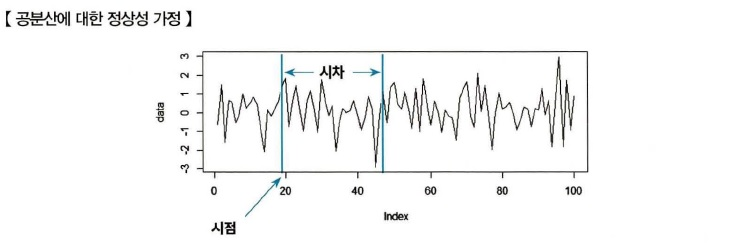

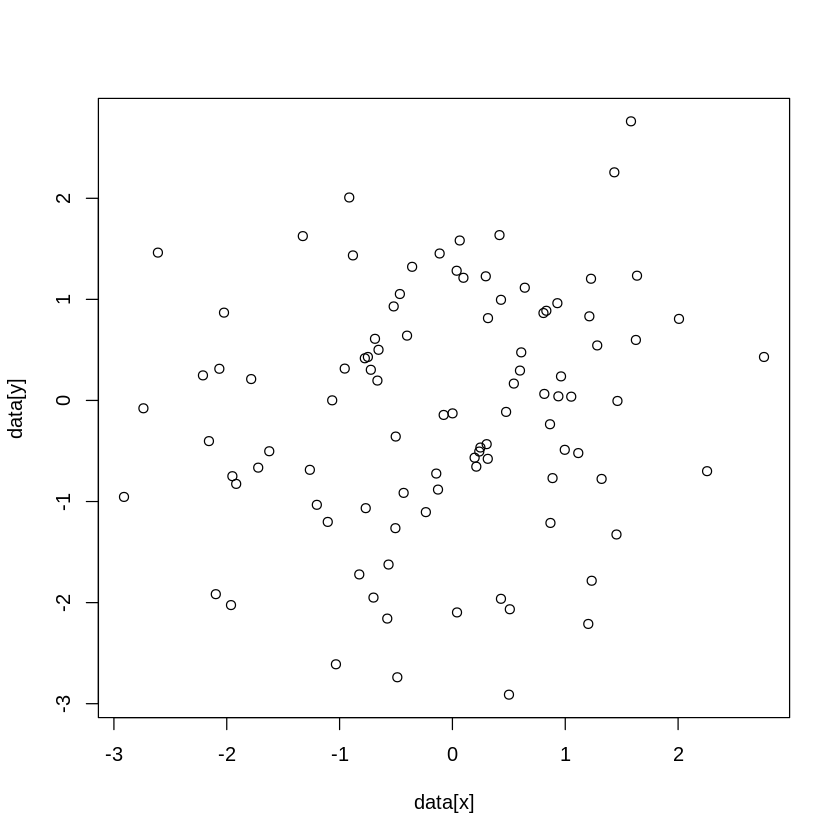

In [5]:
# 임의의 시계열 데이터 생성
data <- rnorm( 100 )
# 시차를 3으로설정
diff <- 3
x <- 1 : (100-diff)
y <- x + diff

# 시차를 3으로 갖는 시계열 자료의 산점도
plot( data[ x ] , data[ y ] )

In [6]:
# 특정 시점이 아닌 시차에 영향을 받는 공분산 값
cov( data[x], data[y])

[1] 0.2103395

## 3) 자기상관계수
### (1) 자기상관계수(ACF: Autocorrelation Function)
* 시계열 분석에서 자기상관계수는 시간의 흐름에 따른 자기상관관계를 나타낸다.
* 어떤 특정한 시점이 아니라 '시간의 흐름'에 따른 변수 간의 상관관계 변화
* 시계열 자료가 시간의 흐름에 따라 일정한 패턴을 보인다면 그것은 바로 변수들이 자기상관성을 갖고 있기 때문
* 시계열 분석에서는 자기상관함수를 시계열 자료가 시간에 의존하지 않고 무작위성을 띠는지 확인하는 데 사용
* 시계열 데이터가 무작위성을 띠지 않는다면 시계열 분석을 통한 미래 시점의
예측도 가능
* 자기상관함수는 특정 시점 t에서의 값과 t로부터 l만큼의 시치를 갖는 t+ l시점에서의 값의 상관계수(자기상관계수)를 나타내는 함수다
* 자기상관함수는 시차 l을 x축으로 상관계수를 y축으로 하는 그래프로 표현 가능
* 시차 l=O 인 경우에는 자신과의 상관계수를 의미하며 항상 1 이다.
* 일반적으로 자기상관계수는 시차가 증가하면서 자기상관계수 값이 감소한다.

### (2) 부분자기상관계수(PACF: Partial Autocorrelation Function)
* 자기상관 함수는 두 시계열 확률변수 간의 상관관계를 보여주지만 부분자기상관함수는 두 시계열 확률변수 간에 다른 시점의 확률변수 영향력은 통제하고 상관관계만 보여준다.
* 두 시계열 확률변수의 상관관계를 알아보려고 할 때 그에 영향을 주는 요소들을 제외하고 오로지 둘 사이의 상관관계만을 고려할 때 부분자기상관계수를 이용한다
* 부분자기상관계수는 시점 t와 시차 l을 갖는 t+ l시점 사이에 존재하는 l - 1개의 자료값이 자기상관계수에 미치는 영향을 제거한 상관계수다.
* 일반적으로 부분자기상관계수는 특정 시점 이후 급격히 감
소한다.

## 4) 시계열 분석 기법 **
### (1) 이동평균법
* 이동평균법은 시계열 데이터에서 일정 기간별로 자료를 묶어 평균을 구하는 방법이다
* 시간이 지남에 따라 평균 계산에 포함되는 자료가 바뀌기 때문에 이동평균법이라고 한다.
* 변동이 많은 시계열 데이터의 평균을 구함으로써 여러 요인으로 인한 변동을 없앨 수 있다.

### (2) 지수평활법
* 이동평균법은 장기적인 추세를 파악하는 데는 효과적이나 m 기간에 따라 평균의 수가 감소하는 단점이있다.
* 지수평활법은 이런 문제점을 해결하기 위해 사용하는 방법으로 최근 자료가 과거 자료보다 예측에 효과적이라는 가정하에 최근 데이터일수록 큰 가중치를 부여하고 오래된 데이터일수록 작은 비중을 부여하는 방식을 사용해 평균을 계산한다.

# 2. 시계열 모형
## 1)자기회귀(AR: Autoregressive)모형 *** 
* 자기회귀 모형은 시계열 자료를 설명하기 위한 모형 중 하나로서 t라는 시점에서의 값 Y/는 이전 시점들 n개에 의해 설명될 수 있음을 의미
* AR(n) 모형을 사용하기 위한 적절한 n의 값을 결정하기 위해서는 부분자기상관함수를 사용한다.

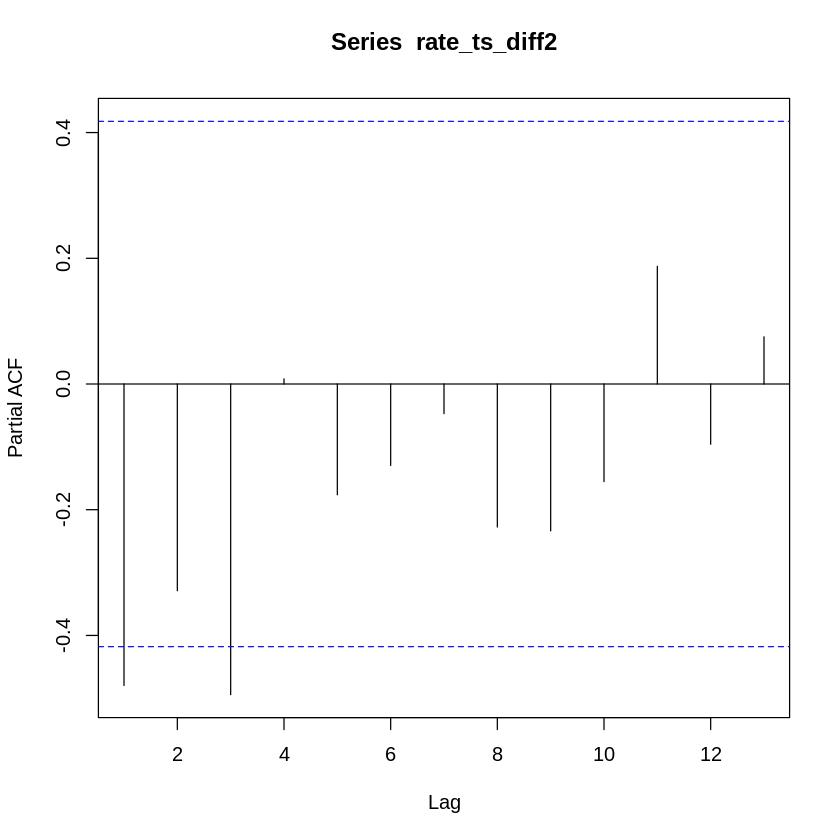

In [7]:
# 2018년 l월부터 2019년 12월까지 매월 초의 환율 데이터
rate <- c( 1072 , 1081 , 1090 , 1065 , 1087 , 1085 , 1130 , 1130 , 1122 , 1122 , 1144 ,
1121 , 1131 , 1129 , 1137 , 1146 , 1176 , 1194 , 1174 , 1200 , 1224 , 1213 , 1172 , 1197 )
# 수치형 벡터를 시계열 자료로 변환
rate_ts <- ts(rate)
# 위 시계열 자료는 평균이 일정하지 앟아 정상성을 만족하지 못함
# 2회의 차분을 실시하여 진행
rate_ts_diff2 <- diff( rate_ts , differences = 2 )
pacf( rate_ts_diff2)

* pacf 그래프를 보아 시차가 2인 지점에서 처음으로 파란선 안에 존재.
* 즉 시차가 2인 지점부터 자기상관이 낮음
* 바로 전인 시차가 l지점까지가 현재 시점에 영향을 미친다고 판단
* 따라서 AR(1) 모형 사용이 가능하다고 판단
* 그러나 시차가 3인 지점에서 다시 파란선 밖에 존재
* 시차가 4인 지점부터 급격히 자기상관이 낮음
* 바로 전인 시차가 3지점까지 현재 시점에 영향을 미친다고 판단 가능
* 따라서 AR(3) 모형 사용이 가능하다고 판단
* 가능한 후보 모형은 AR(1) 과 AR(3)이 다

## 2) 이동평균(MA: Moving Average) 모형 ***
* 자기회귀모형이 이전 시점들의 자료값들에 의한 선형결합이라면 이동평균 모형은 이전 시점의 백색 잡음들의 선형결합으로 표현할 수 있다.
* 백색잡음들의 선형결합으로 이루어져 있기 때문에 항상 정상성을 만족하는 모형이다.
* MA(n) 모형을 사용하기 위한 적절한 n의 값을 결정하기 위해서는 자기상관함수를 사용한다.

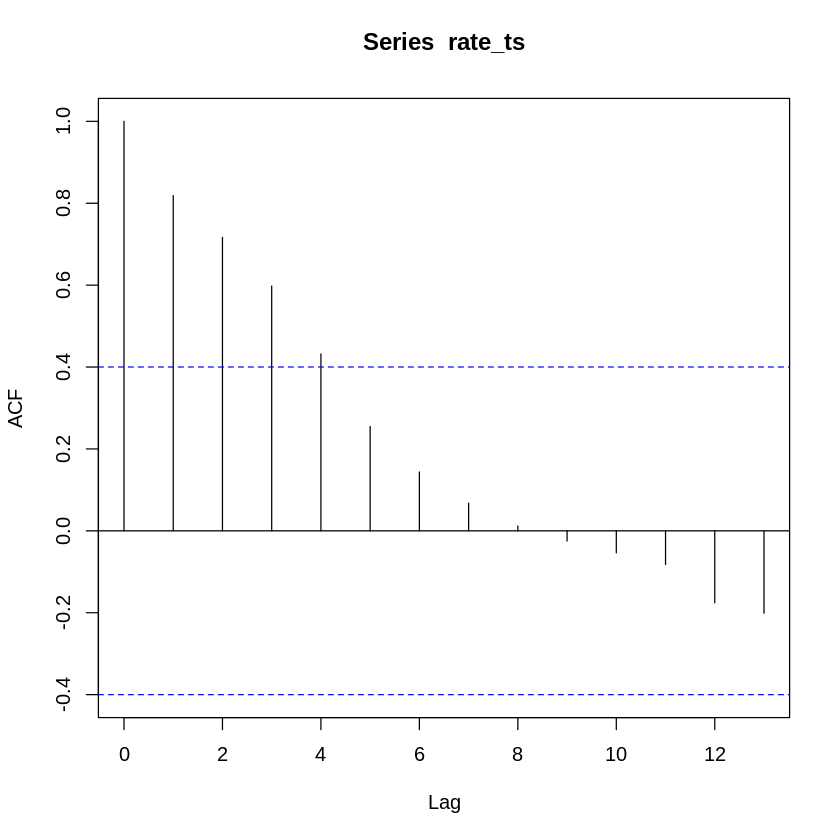

In [8]:
# 2018년 l월부터 2019년 12월까지 매월 초의 환율 데이터
rate <- c( 1072 , 1081 , 1090 , 1065 , 1087 , 1085 , 1130 , 1130 , 1122 , 1122 , 1144 ,
1121 , 1131 , 1129 , 1137 , 1146 , 1176 , 1194 , 1174 , 1200 , 1224 , 1213 , 1172 , 1197 )
# 수치형 벡터를 시계열 자료로 변환
rate_ts <- ts(rate)
# 위 시계열 자료는 평균이 일정하지 앟아 정상성을 만족하지 못함
# 정상성 가정이 필요하지 않으므로 차분 없이 진행
acf(rate_ts)

* pacf 그래프에서 시차가 5인 지점에서 처음으로 파란선 안에 존재
* 즉 시차가 5인 지점부터 자기상관이 낮음
* 바로 전 시차가 4지점까지가 현재 시점에 영향을 미친다고 판단
* 따라서 MA(4) 모형 사용이 적절

## 3) 자기회귀누적이동평균 모형(ARIMA) ***
* 자기회귀누적이동평균(뼈lMA: Autoregressive lntegrated Moving Average) 모형은 비정상 시계열 자료를 다룰 수 있는 모형으로 현실에 존재히는 대부분의 시계열 자료를 설명할 수 있다.
* 비정상 시계열이기 때문에 차분이나 변환을 통해 정상화할 수 있다.

In [9]:
# 2018년 l월부터 2019년 12월까지 매월 초의 환율 데이터
rate <- c( 1072 , 1081 , 1090 , 1065 , 1087 , 1085 , 1130 , 1130 , 1122 , 1122 , 1144 ,
1121 , 1131 , 1129 , 1137 , 1146 , 1176 , 1194 , 1174 , 1200 , 1224 , 1213 , 1172 , 1197 )
# 수치형 벡터를 시계열 자료로 변환
rate_ts <- ts(rate)

In [10]:
# 만약 auto.arima가 없다연 아래 두 줄을 실행
# auto.arima 함수를 사용하여 최적의 모형을 구할 수 있다.
install.packages('xts')
install.packages('forecast', dependencies = T )
library( forecast ) # forecast 패키지에 내장되어 있는 auto .arima 함수를 사용

# 최적의 모형을 선정
auto.arima( rate_ts)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘x13binary’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Series: rate_ts 
ARIMA(0,1,0) 

sigma^2 = 431.7:  log likelihood = -102.41
AIC=206.83   AICc=207.02   BIC=207.96

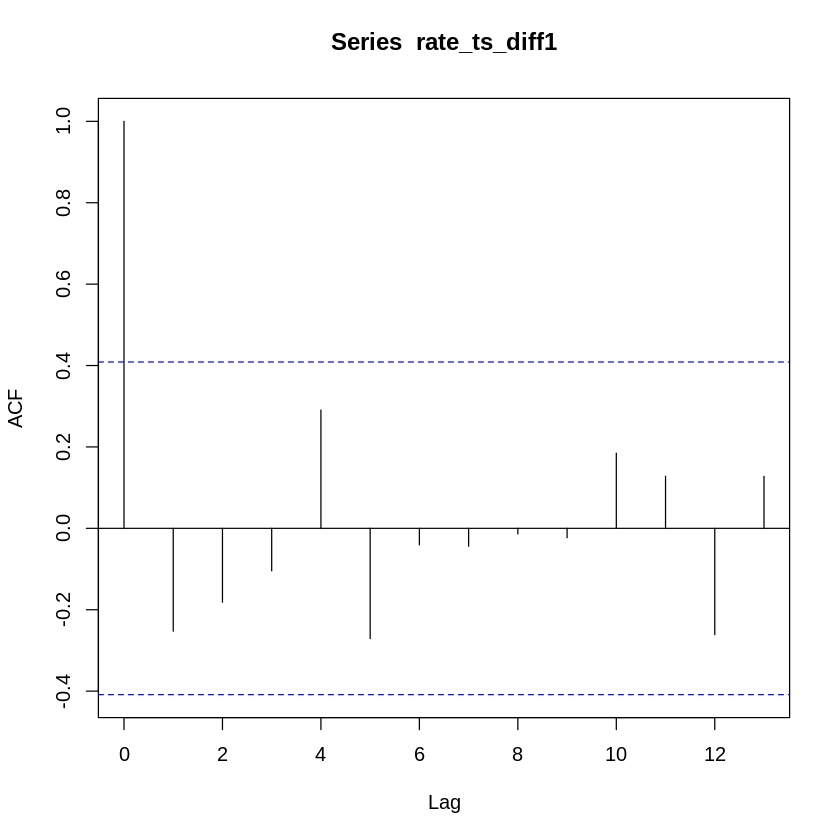

In [11]:
# 최적의 모형은 정상성 만족을 위해 l회의 차분이 필요한 ARIMA( 0 , 1 , 0 ) 이다.
# 1호| 차분을 진행한 뒤 자기상관함수와 부분자기상관함수를 확인해보자.
rate_ts_diff1 <- diff( rate_ts , differences = 1 )
acf( rate_ts_diff1 )

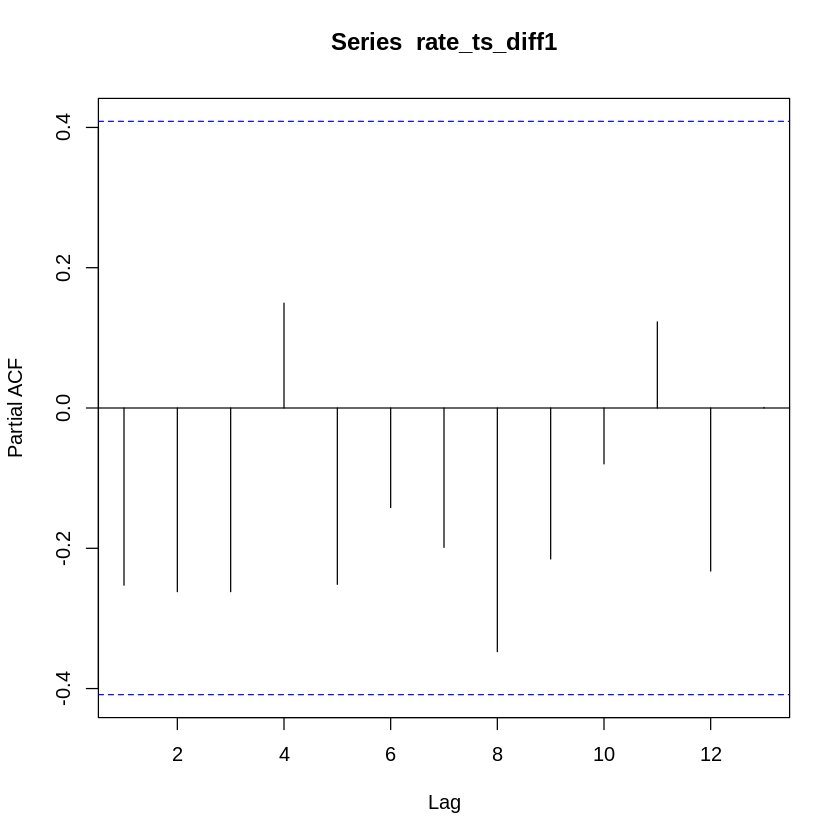

In [12]:
pacf( rate_ts_diff1)

* 두 그래프 모두 시차가 l인 지점에서 처음으로 파란선 안에 존재
* 즉 시차가 1인 지점부터 자기상관이 낮음
* 시차가 1, 즉 바로 이전 시점이 현재 시점에 영향을 주지 않는다고 판단 가능
* 1회 차분 시 AR(0) ， MA(0)이 되는 것을 확인할 수 있다.
* 결론적으로 1회 차분하여 정상성을 만족하는 자료는 이전 시점에 영향을 받지 않는
* 무작위 변동이라고 판단할 수 있다.
* 2년간 24개의 자료가 아닌 더 많은 데이터를 보유하고 있다면 다른 결과가 나올 수 있다.

## 4) 분해 시계열 **
* 시계열은 추세요인, 계절요인, 순환요인, 불규칙요인 등으로 구성되며, 이들 요인이 서로 복잡하게 혼합되어 하나의 시계열 데이터를 구성
* 분석 목적에 따라 특정 요인만 분리해 분석하거나 제거하는 작업을 하게 되는데 ， 이를 분해시계열이라고한다. 주로 회귀분석과 함께 사용한다.
* 분해 시계열은 추세요인(Trend), 계절요인(Seasonal), 순환요인(Cyclical), 불규칙요인(Irregular)의 4가지 요인으로 구성되어 있다.


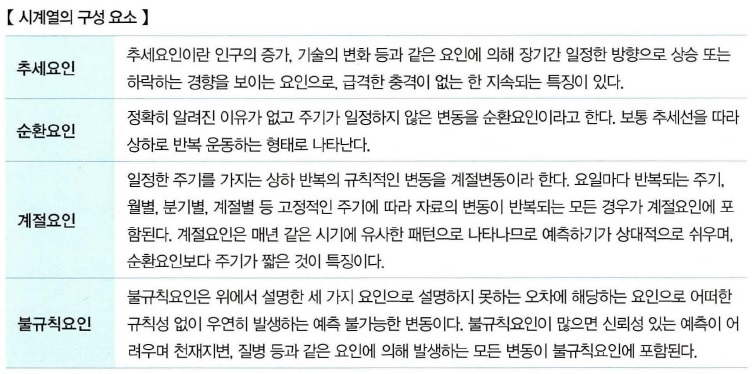

## 5) 시계열 분석 예시 **
* R 패키지 중 datasets 패키지가 보유한 Nile 데이터를 사용하여 시계열 분석

In [13]:
library( datasets )
library( forecast )
auto.arima( Nile )

Series: Nile 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 = 20177:  log likelihood = -630.63
AIC=1267.25   AICc=1267.51   BIC=1275.04

In [14]:
# ARIMA(l, 1, 1) 모형이 적절하다고 판단
# ARIMA(l, 1, 1) 모형으로 Nile 데이터 모형 구축
result <- arima( Nile , order = c( 1 , 1 , 1 ) )

In [15]:
# 구축된 모형으로 미래 5년 예측
pred <- forecast(result, h=5)
pred

     Point Forecast    Lo 80     Hi 80    Lo 95    Hi 95
1971       816.1813 635.9909  996.3717 540.6039 1091.759
1972       835.5596 642.7830 1028.3363 540.7332 1130.386
1973       840.4889 643.5842 1037.3936 539.3492 1141.629
1974       841.7428 642.1115 1041.3741 536.4331 1147.053
1975       842.0617 640.0311 1044.0923 533.0826 1151.041

* Forec a st는 예측 평균값
* 내년 유입량의 80% 신뢰 구간은 Lo 80과 Hi 80인 635 .9909와 996.3717 사이
* 내년 유입량의 95% 신뢰 구간은 Lo 95와 Hi 95인 549.6039와 1091.759 사이

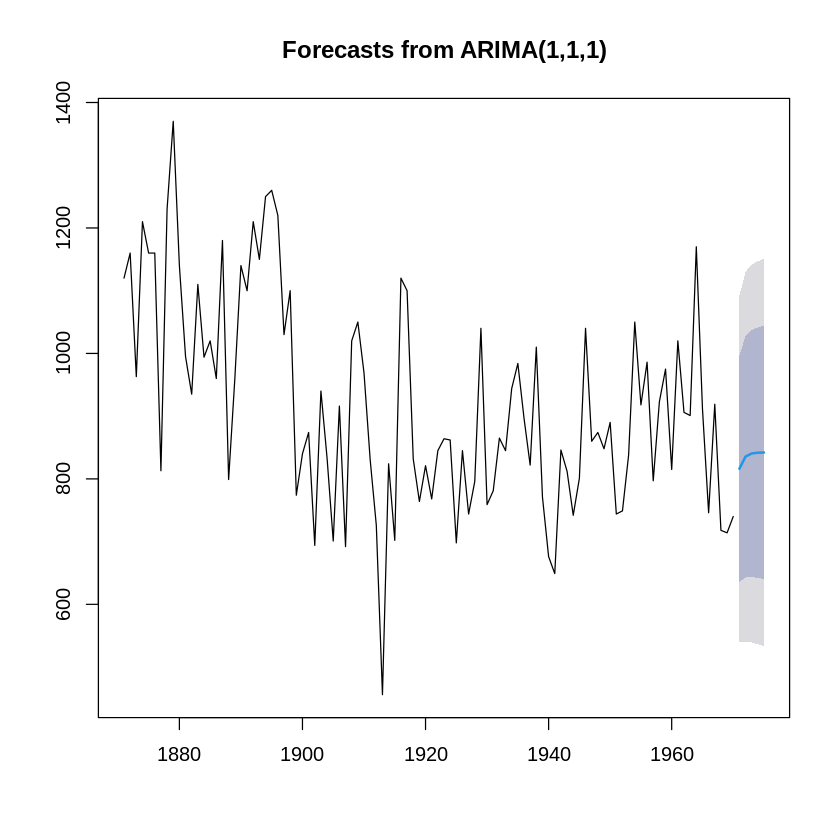

In [16]:
# 예즉 데이터를 시각화해서도 확인 가능하다.
plot( pred )